In [56]:

# Libraries
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 

# Set the plotting style
plt.style.use('ggplot')

# Set the default figure size
matplotlib.rcParams['figure.figsize'] = (12, 8)

# Ensure plots are displayed inline
%matplotlib inline

In [8]:
#Data Importing 

movie_df=pd.read_csv(r'C:\Users\salah\Desktop\Data analysis\movies.csv')

movie_df.head()    


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [10]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in movie_df.columns:
    pct_missing = np.mean(movie_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [57]:
# Data types
movie_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [58]:
# converting NaN into zeros
movie_df['budget'] = movie_df['budget'].fillna(0)

movie_df['gross'] = movie_df['gross'].fillna(0)


In [59]:
#Data type optimization

movie_df['budget']=movie_df['budget'].astype('int64')

movie_df['gross']=movie_df['gross'].astype('int64')

In [60]:
# Matching the release year to the year column

movie_df['yearOfRelease'] = movie_df['released'].str.split(', ').str[1].str[:4]
movie_df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearOfRelease
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020


In [11]:
movie_df.sort_values(by=['budget'],inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000.0,1.332699e+09,Walt Disney Pictures,152.0
7066,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000.0,9.609965e+08,Walt Disney Pictures,169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,Leap,NaN,Drama,2020,"September 25, 2020 (United States)",6.7,903.0,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,NaN,2.581888e+07,NaN,135.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,NaN,1.326600e+04,Roxwell Films,87.0
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0


In [53]:
pd.reset_option('display.max_rows')

"""# Set the maximum number of rows to None
pd.set_option('display.max_rows', None)

# Reset the maximum number of rows to default
pd.reset_option('display.max_rows')"""

In [62]:
#Dropping duplicates

movie_df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearOfRelease
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020


In [ ]:
#hypothesis:-

#1-Corelation between budget and Gross_income directly proportional
#2-Certain companies Has a high Gross_income



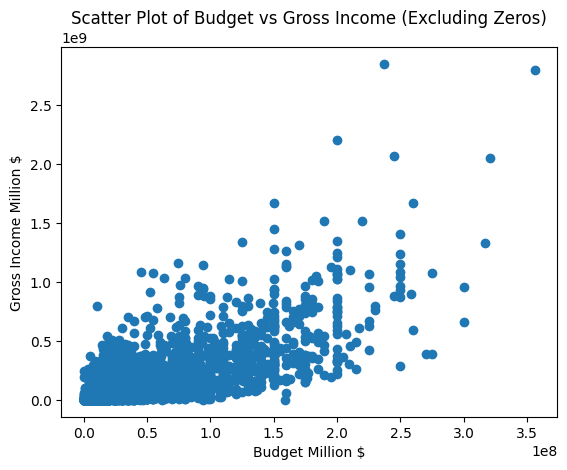

In [67]:
# scatter plot (Budget vs gross income)

df_filtered = movie_df[(movie_df[['budget', 'gross']] != 0).all(axis=1)]

# Create a scatter plot
plt.scatter(df_filtered['budget'], df_filtered['gross'])
plt.xlabel('Budget Million $')
plt.ylabel('Gross Income Million $')
plt.title('Scatter Plot of Budget vs Gross Income (Excluding Zeros)')
plt.show()


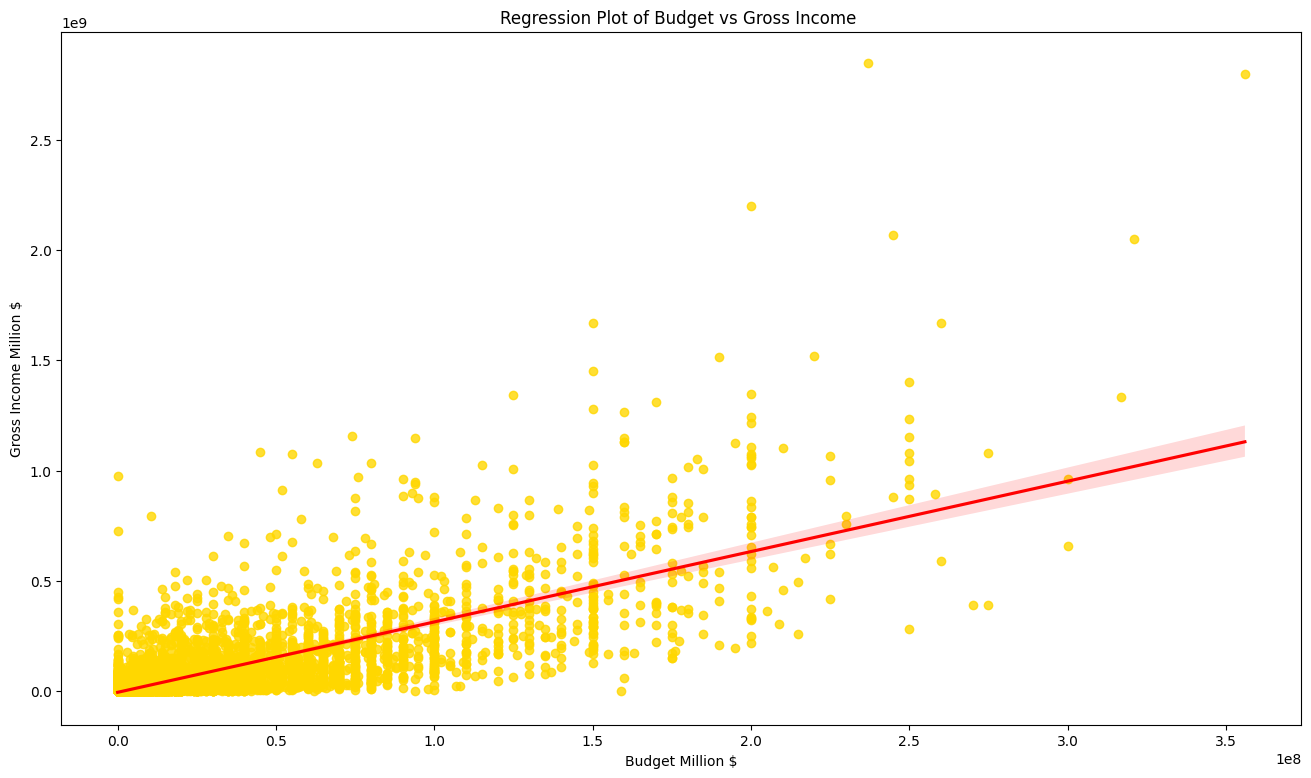

In [76]:
# To get a regression (relation between the x adn y) we need to do a regplot
plt.figure(figsize=(16, 9))
sns.regplot(data=movie_df, x='budget', y='gross',scatter_kws={'color':'gold'},line_kws={'color':'red'})
plt.xlabel('Budget Million $')
plt.ylabel('Gross Income Million $')
plt.title('Regression Plot of Budget vs Gross Income ')
plt.show()

# The slope shwos that the relation is directly proportional

In [13]:
# correlations using (pearson)  but there are other methods (kendall,spearman)
columns_for_correlation = ['budget', 'gross','score','votes','year']

# Calculate the correlation table
correlation_table = movie_df[columns_for_correlation].corr(method='pearson')
print(correlation_table)


 # correlation = 0.75 

          budget     gross     score     votes      year
budget  1.000000  0.740395  0.076254  0.442429  0.329321
gross   0.740395  1.000000  0.186258  0.630757  0.257486
score   0.076254  0.186258  1.000000  0.409182  0.097995
votes   0.442429  0.630757  0.409182  1.000000  0.222945
year    0.329321  0.257486  0.097995  0.222945  1.000000


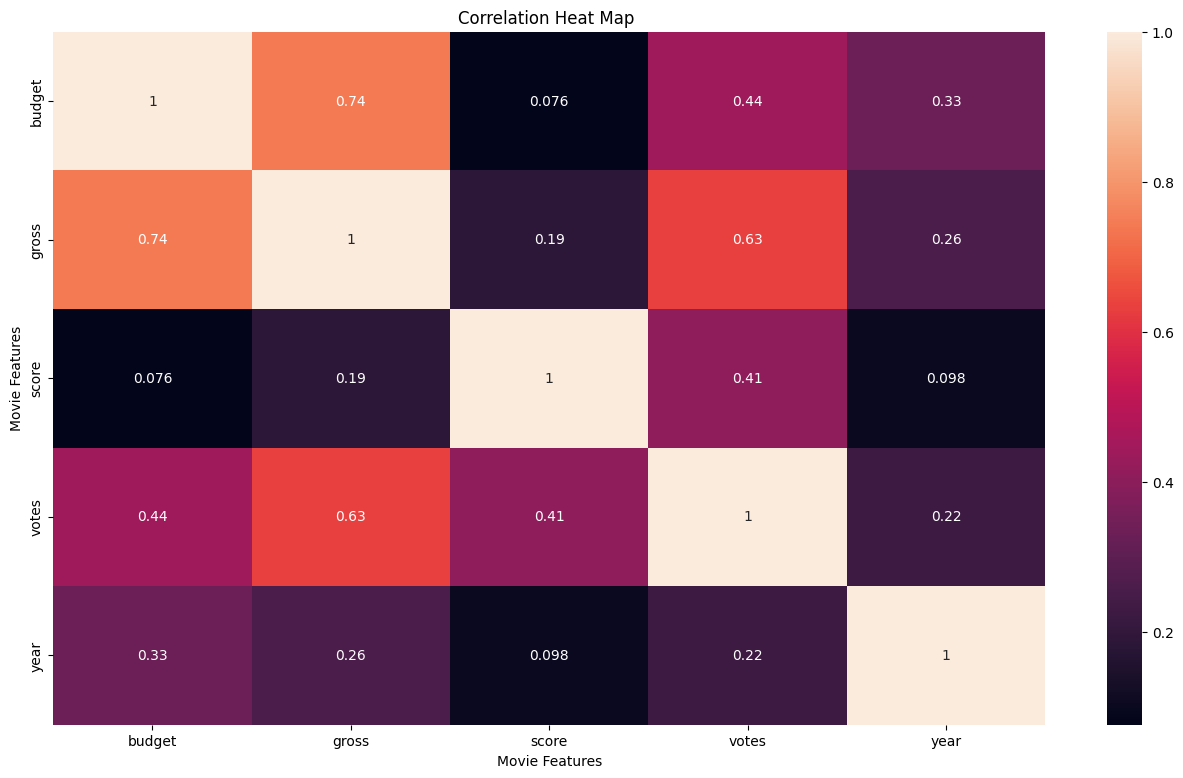

In [19]:
# Heat map to shoe the corelation matrix
plt.figure(figsize=(16, 9))
sns.heatmap(correlation_table,annot=True)
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.title('Correlation Heat Map ')
plt.show()

# black is the lowest while gray is the highest 

In [30]:
# Companies sucsess 
#company_counts = movie_df['company'].value_counts()
company_gross_sum = movie_df.groupby('company')['gross'].sum().reset_index()
company_gross_sum_sorted = company_gross_sum.sort_values(by='gross', ascending=False)
company_gross_sum_sorted 


,company,gross
2319,Warner Bros.,5.649142e+10
2281,Universal Pictures,5.251419e+10
731,Columbia Pictures,4.300894e+10
1812,Paramount Pictures,4.049361e+10
2253,Twentieth Century Fox,4.025705e+10
...,...,...
1156,Georgian-Film,0.000000e+00
2184,The Jerry Gross Organization,0.000000e+00
83,Abominable Pictures,0.000000e+00
2193,The Mount Company (II),0.000000e+00


In [36]:
# data numrization
df3 = movie_df.copy() 
for col in df3.columns:
    if df3[col].dtype == 'object':
        df3[col] = df3[col].astype('category') 
        df3[col] = df3[col].cat.codes  

df3

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0


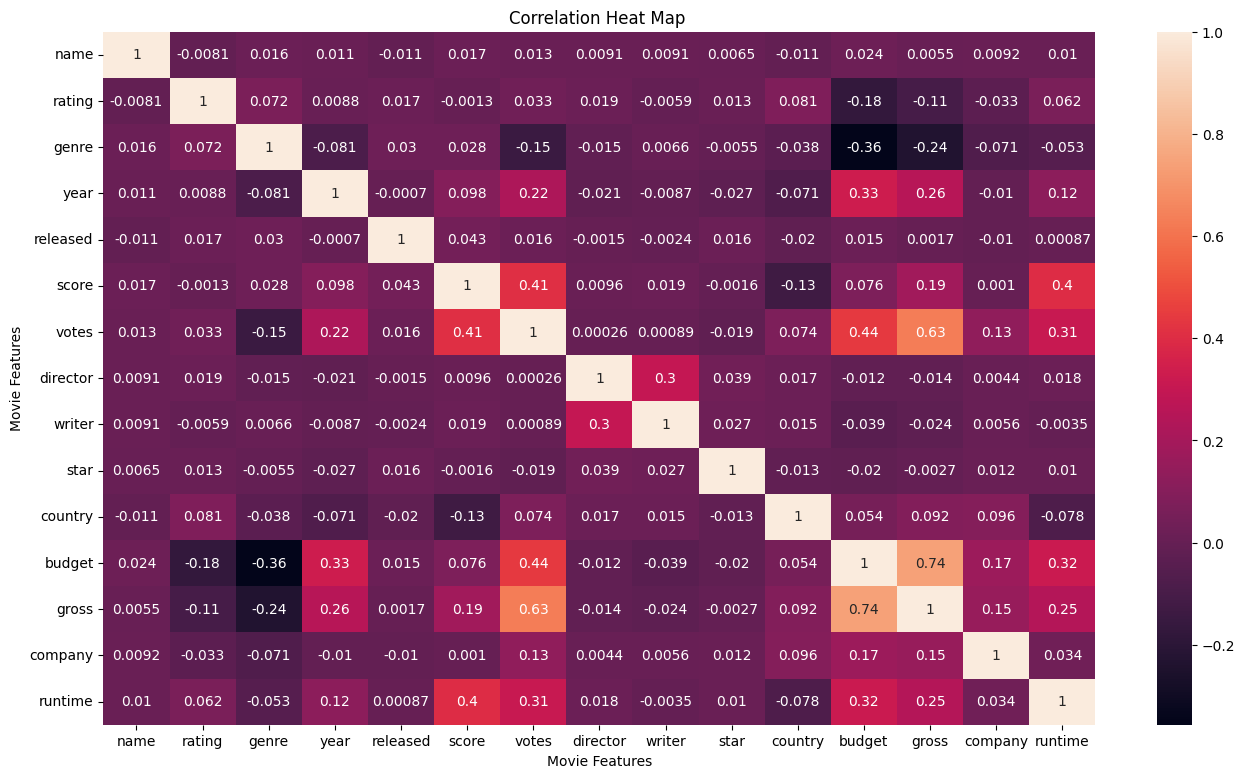

In [39]:
correlation_table = df3.corr(method='pearson')
plt.figure(figsize=(16, 9))

sns.heatmap(correlation_table,annot=True)
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.title('Correlation Heat Map ')
plt.show()


In [ ]:
# amazing stats , we can see that
"""
1- The genra has nor relation with the income 
2- the votes and the budget directly proportional with the income
3- the more the run time the less the income



"""

In [43]:
# unstackig of  the correlations showing them as pairs 
corr_pairs=df3.corr().unstack()
paired_correlations=corr_pairs.sort_values()
paired_correlations

budget    genre      -0.356564
genre     budget     -0.356564
          gross      -0.235650
gross     genre      -0.235650
rating    budget     -0.176002
budget    rating     -0.176002
genre     votes      -0.145307
votes     genre      -0.145307
score     country    -0.133348
country   score      -0.133348
gross     rating     -0.107339
rating    gross      -0.107339
year      genre      -0.081261
genre     year       -0.081261
country   runtime    -0.078412
runtime   country    -0.078412
company   genre      -0.071067
genre     company    -0.071067
year      country    -0.070938
country   year       -0.070938
runtime   genre      -0.052711
genre     runtime    -0.052711
writer    budget     -0.039451
budget    writer     -0.039451
genre     country    -0.037615
country   genre      -0.037615
company   rating     -0.032943
rating    company    -0.032943
star      year       -0.027242
year      star       -0.027242
writer    gross      -0.023519
gross     writer     -0.023519
year    

In [52]:
# show only high correlation pair =>0.5 and less than 1 annd no duplicates:
high_corr = paired_correlations[(paired_correlations > 0.5) & (paired_correlations < 1)].drop_duplicates()
high_corr

gross   votes    0.630757
budget  gross    0.740395
dtype: float64

#1-Corelation between budget and Gross_income is directly proportional (correct with a corr of 0.74)

#2-a company's name has an effect on Gross_income (wrong companies has no effect on the gross income of a movie )

